# Problem 1

## MNIST

In [2]:
import numpy as np
# source: http://scikit-learn.org/stable/datasets/index.html

from sklearn.datasets import fetch_mldata

mnist_data = fetch_mldata('MNIST original')['data']

#get the labels of the MNIST dataset 
mnist_label = fetch_mldata('MNIST original')['target']
len(mnist_data)

70000

## 20NG News

In [3]:
# code source from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#
# code source from http://www.nltk.org/book/ch02.html
# code source from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

from sklearn.datasets import fetch_20newsgroups

import nltk
from nltk.corpus import stopwords
import string


# extracts the archive contents in the ~/scikit_learn_data/20news_home folder 
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

################# this part is for pre-processing the text file which isn't mandatory
# get rid of the stopwords and punctuation
nltk.download('stopwords')
stop_word =stopwords.words('english')
punctuation = string.punctuation
stopw_punctuation = list(stop_word) + list(punctuation)

# from nltk.tokenize import word_tokenize

# # to tokenize the word
# for j in range(len(newsgroups_train.data)):
#     newsgroups_train.data[j] = " ".join([w for w in word_tokenize(newsgroups_train.data[j]) if w not in stopw_punctuation])
#    # print(newsgroups_train.data[])
# for j in range(len(newsgroups_test.data)):
#     newsgroups_test.data[j] = " ".join([w for w in word_tokenize(newsgroups_train.data[j]) if w not in stopw_punctuation])

#print(len(newsgroups_train.data))
#print(newsgroups_train.data[1])

##############

# from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english')
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
# the test data set don't need to fit
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english', vocabulary = vectorizer.vocabulary_)
vectors_test = vectorizer.fit_transform(newsgroups_test.data)
print(vectors_train.shape)
print(vectors_test.shape)


news_train = vectors_train
news_test = vectors_test



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deshenghu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(11314, 129791)
(7532, 129791)


## Spam

In [8]:
import numpy as np
import csv

##The “mnist_train_fashion.csv” is downloaded from webpage of this link : https://www.kaggle.com/zalando-research/fashionmnist
## here we only use the training data set for running the program

# data_array_fashion is to store the training data
spam = []
with open("/Users/deshenghu/Dropbox/Dataset_CS6220/spambase/spambase.data") as t:
    for row in t:
        spam.append(list(map(float, row.replace("\n", "").split(","))))

spam_data = []
spam_label = []

for i in range(len(spam)):
    spam_label.append(spam[i][-1])
    #### equal to  spam_data.append(list(map(float, row[:57])))
    spam_data.append(spam[i][:-1])

print(spam_data[:10])
print(spam_label[:10])
print(len(spam_data))
print(len(spam_label))

[[0.0, 0.64, 0.64, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.32, 0.0, 1.29, 1.93, 0.0, 0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.778, 0.0, 0.0, 3.756, 61.0, 278.0], [0.21, 0.28, 0.5, 0.0, 0.14, 0.28, 0.21, 0.07, 0.0, 0.94, 0.21, 0.79, 0.65, 0.21, 0.14, 0.14, 0.07, 0.28, 3.47, 0.0, 1.59, 0.0, 0.43, 0.43, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.372, 0.18, 0.048, 5.114, 101.0, 1028.0], [0.06, 0.0, 0.71, 0.0, 1.23, 0.19, 0.19, 0.12, 0.64, 0.25, 0.38, 0.45, 0.12, 0.0, 1.75, 0.06, 0.06, 1.03, 1.36, 0.32, 0.51, 0.0, 1.16, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.0, 0.0, 0.12, 0.0, 0.06, 0.06, 0.0, 0.0, 0.01, 0.143, 0.0, 0.276, 0.184, 0.01, 9.821, 485.0, 2259.0], [0.0, 0.0, 0.0, 0.0, 0.63, 0.0, 0.31, 0.63, 0.31, 

In [24]:
from sklearn.linear_model import LogisticRegression as LR
LR_L2 = LR(penalty='l2')

news_train_label = newsgroups_train.target
news_test_label = newsgroups_test.target
# train the model using the training dataset
LR_L2.fit(news_train, news_train_label)
accuracy_news_train = LR_L2.score(news_train, news_train_label)

# the accuracy score of the test data set
accuracy_news_test = LR_L2.score(news_test, news_test_label)
print(accuracy_news_test)

print("20NG News Training dataset, Accuracy of LR with L2_reg is {}".format(accuracy_news_train))
print("20NG News Test dataset, Accuracy of LR with L2_reg is {}".format(accuracy_news_test))



0.844530005311
20NG News Training dataset, Accuracy of LR with L2_reg is 0.9784337988333038
20NG News Test dataset, Accuracy of LR with L2_reg is 0.8445300053106745


In [34]:
def Top_N_features(coef, N, kinds, features = False):
    features_dic = {}
    for  i in range(len(coef)):
        #abs_coef = abs(coef[i])
        kind = kinds[i]
        indexes = abs(coef[i]).argsort()[::-1][:N]
        if features == False:
            words = [i for i in indexes]
        else:
            words = [features[i] for i in indexes]
        coefs_new = sorted(abs(coef[i]))[::-1][:N]
        features_dic[kind] = list(zip(words, coefs_new))
    
    return features_dic       

In [35]:
Top_N_features(LR_L2_news_train.coef_, 30, newsgroups_train.target_names, vectorizer.get_feature_names())

{'alt.atheism': [('keith', 4.8777573852069818),
  ('atheism', 4.17904288710755),
  ('atheists', 3.8611738514629206),
  ('caltech', 3.0447109744512511),
  ('islamic', 2.9951422272323125),
  ('okcforum', 2.7491897903423412),
  ('god', 2.7316449279527739),
  ('islam', 2.7146297176851806),
  ('mathew', 2.6470460549851493),
  ('livesey', 2.578585699618456),
  ('jaeger', 2.5343223785989561),
  ('rushdie', 2.3790888641606318),
  ('mangoe', 2.2365235946068429),
  ('benedikt', 2.2084956493391292),
  ('religion', 2.2014952871220994),
  ('umd', 2.1540762318486695),
  ('osrhe', 2.1081049069193036),
  ('wingate', 2.0812411843335883),
  ('edu', 2.0390798185001353),
  ('sgi', 2.0257076353256798),
  ('kmr4', 1.9811750071984489),
  ('cobb', 1.9099154068137993),
  ('bible', 1.9098927335351683),
  ('mantis', 1.856591878540143),
  ('gregg', 1.8344492106419228),
  ('tek', 1.8269042929941197),
  ('solntze', 1.8257160422590051),
  ('ico', 1.7865486916617637),
  ('schneider', 1.7795229950059304),
  ('wwc', 1.

In [3]:
from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

mnist_data_sparse = sparse.csr_matrix(mnist_data)
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR_L2 = LR(penalty='l2', solver = 'sag')
print(mnist_data_sparse.shape)
print(mnist_label.shape)
print(mnist_data.shape)
LR_L2_mnist_train = LR_L2.fit(mnist_data_sparse, mnist_label)
accuracy_mnist_train = LR_L2_mnist_train.score(mnist_data, mnist_label)

print("MNIST dataset, Accuracy of LR with L2_reg is {}".format(accuracy_mnist_train))


(70000, 784)
(70000,)
(70000, 784)


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


MNIST dataset, Accuracy of LR with L2_reg is 0.9262857142857143


In [36]:
Top_N_features(LR_L2_mnist_train.coef_, 30, list(range(0,10)))

{0: [(249, 0.013674242311208567),
  (718, 0.012966676179494614),
  (717, 0.012280285999349409),
  (715, 0.0120848109603822),
  (305, 0.011250944665450988),
  (277, 0.01122303943661534),
  (94, 0.010118089120763916),
  (333, 0.0098801370017300334),
  (710, 0.0090668935940155584),
  (712, 0.0089879922180351041),
  (71, 0.0089170298135642437),
  (221, 0.0089151865594515444),
  (716, 0.0087693895254739515),
  (70, 0.008688501744846552),
  (707, 0.008644429956137456),
  (192, 0.0082168967415323663),
  (73, 0.0081854739971280593),
  (250, 0.008069408381569932),
  (406, 0.0080061340800059808),
  (193, 0.0080041563420464971),
  (648, 0.0079410104664188064),
  (93, 0.0078818522552962511),
  (312, 0.0078515492844252951),
  (72, 0.0077250724104871099),
  (743, 0.0076203819911684345),
  (737, 0.0075245610752188363),
  (67, 0.0075010620172931098),
  (96, 0.0074546477501922261),
  (742, 0.0073730474285182736),
  (706, 0.0073448537886369675)],
 1: [(711, 0.013847784620373392),
  (710, 0.0130128384588

In [25]:
from sklearn.linear_model import LogisticRegression as LR
LR_L2 = LR(penalty='l2')

LR_L2_spam_train = LR_L2.fit(spam_data, spam_label)
accuracy_spam_train = LR_L2_spam_train.score(spam_data, spam_label)

print("Spam dataset, Accuracy of LR with L2_reg is {}".format(accuracy_spam_train))

Spam dataset, Accuracy of LR with L2_reg is 0.9324059986959357


In [37]:
Top_N_features(LR_L2_spam_train.coef_, 30, [0,1])

{0: [(52, 3.7471683469009123),
  (26, 3.5375216281862438),
  (6, 2.1815308842092214),
  (22, 2.1627201235689495),
  (41, 1.8337823165792366),
  (24, 1.7918195994063204),
  (47, 1.4668826465915987),
  (45, 1.4049871826518967),
  (43, 1.3767458877553009),
  (40, 1.353796874676956),
  (28, 1.2831499327821121),
  (53, 1.1247961922790306),
  (34, 1.1147176998404829),
  (48, 1.1121669454326022),
  (15, 1.0264316817872088),
  (25, 1.0199180025275005),
  (19, 0.95727536348910924),
  (14, 0.90169451744842988),
  (16, 0.90005396493947909),
  (32, 0.87429034874524536),
  (46, 0.86372980918554676),
  (35, 0.80070249390726589),
  (42, 0.78456613684489862),
  (5, 0.7826363102550854),
  (38, 0.76822824720521155),
  (3, 0.75953173566085408),
  (8, 0.69660096156987428),
  (44, 0.67914021685458592),
  (7, 0.57016780835190162),
  (4, 0.56612940703129844)]}

In [53]:
from sklearn.tree import DecisionTreeClassifier as DT
news_train_label = newsgroups_train.target
news_test_label = newsgroups_test.target

DT = DT()
DT_news_train = DT.fit(news_train, news_train_label)


accuracy_news_train = DT_news_train.score(news_train, news_train_label)
accuracy_news_test = DT_news_train.score(news_test, news_test_label)

print("20NG news dataset, Accuracy of DT is {}".format(accuracy_news_train))
print("20NG news dataset, Accuracy of DT is {}".format(accuracy_news_test))

## The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
## link: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
depth = DT_news_train.tree_.max_depth
total_leaves = DT_news_train.tree_.node_count

print("The Maximum depth of the DT over 20NG news dataset is {}".format(depth))
print("The total leaves of the DT over 20NG news dataset is {}".format(total_leaves))


20NG news dataset, Accuracy of DT is 0.9999116139296447
20NG news dataset, Accuracy of DT is 0.5828465215082316
The Maximum depth of the DT over 20NG news dataset is 287
The total leaves of the DT over 20NG news dataset is 4189


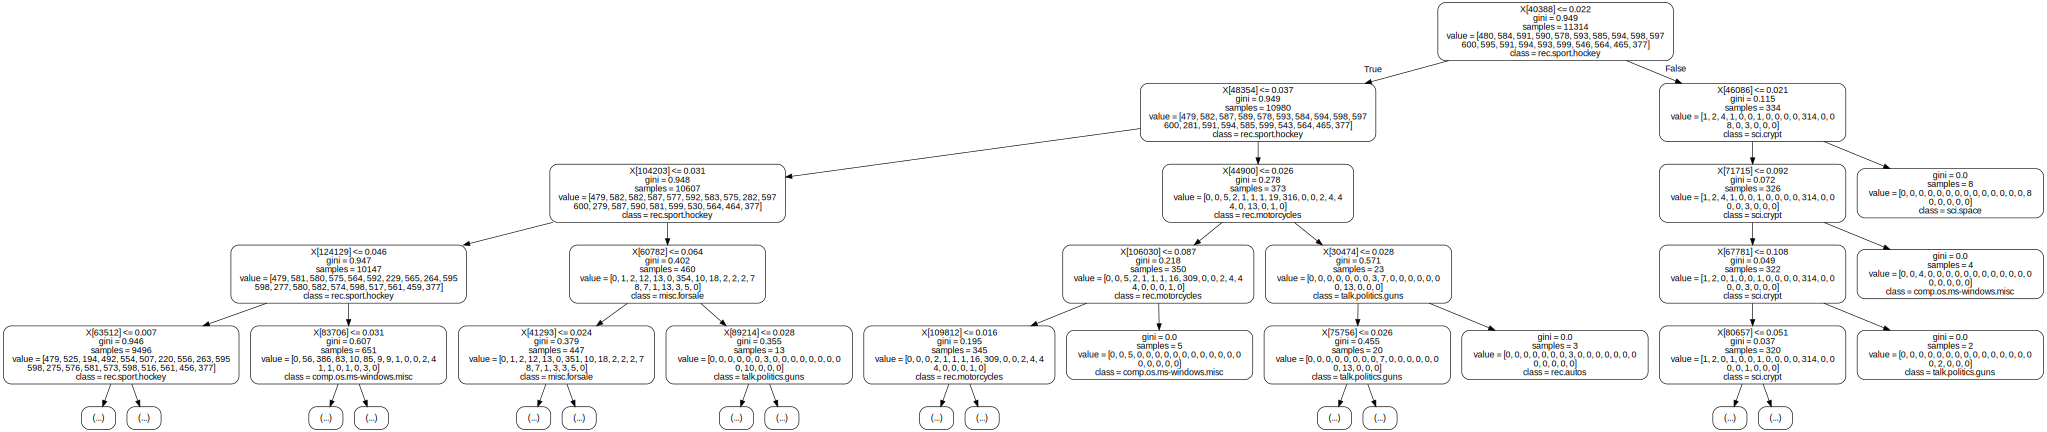

In [61]:
from graphviz import Source
from sklearn.tree import export_graphviz as eg
## http://graphviz.readthedocs.io/en/stable/manual.html
## graphviz provides a simple pure-Python interface for the Graphviz graph-drawing softwar

## Export a decision tree in DOT format.
## link: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
names = newsgroups_train.target_names
DOT1 = eg(DT_news_train, out_file = None, class_names = names, max_depth =4, rounded = True, )

graph1 = Source(DOT1)
graph1



MNISt dataset, Accuracy of DT is 1.0


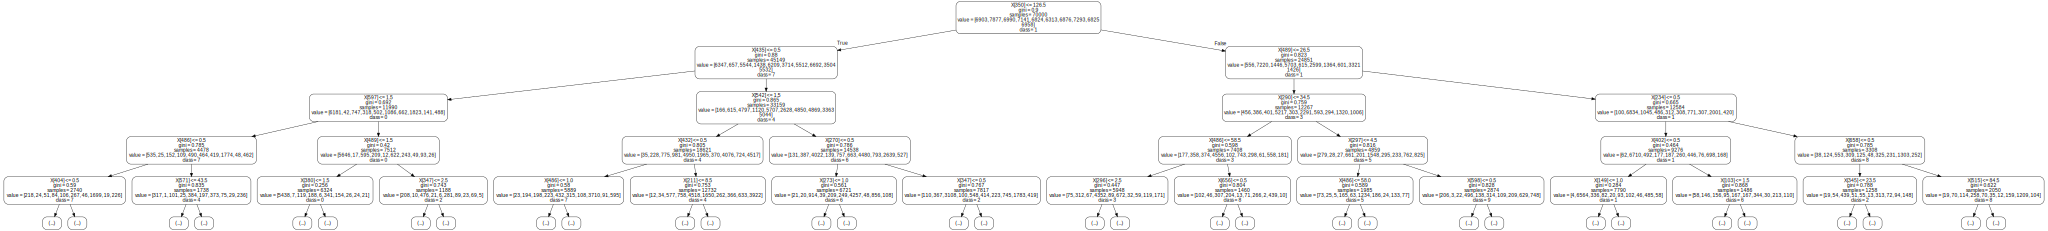

In [76]:
from sklearn.tree import DecisionTreeClassifier as DT

DT = DT()
DT_mnist_train = DT.fit(mnist_data, mnist_label)


accuracy_mnist_train = DT_mnist_train.score(mnist_data, mnist_label)

print("MNISt dataset, Accuracy of DT is {}".format(accuracy_mnist_train))

from graphviz import Source
from sklearn.tree import export_graphviz as eg
## http://graphviz.readthedocs.io/en/stable/manual.html
## graphviz provides a simple pure-Python interface for the Graphviz graph-drawing softwar

## Export a decision tree in DOT format.
## link: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
DOT2 = eg(DT_mnist_train, out_file = None, class_names = [str(i) for i in range(0, 10)], max_depth =4, rounded = True, )
graph2 = Source(DOT2)
graph2          


Spam dataset, Accuracy of DT is 0.9993479678330798


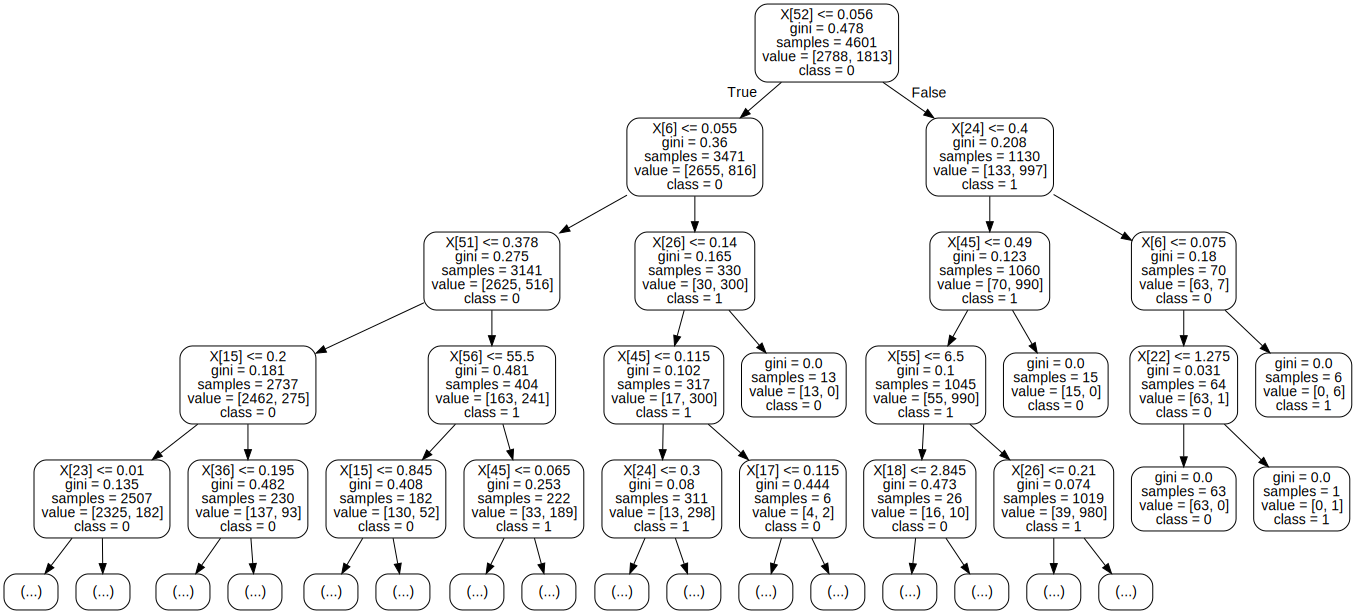

In [77]:
from sklearn.tree import DecisionTreeClassifier as DT

DT = DT()
DT_spam_train = DT.fit(spam_data, spam_label)


accuracy_spam_train = DT_spam_train.score(spam_data, spam_label)

print("Spam dataset, Accuracy of DT is {}".format(accuracy_spam_train))

from graphviz import Source
from sklearn.tree import export_graphviz as eg
## http://graphviz.readthedocs.io/en/stable/manual.html
## graphviz provides a simple pure-Python interface for the Graphviz graph-drawing softwar

## Export a decision tree in DOT format.
## link: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
DOT3 = eg(DT_spam_train, out_file = None, class_names = [str(0), str(1)], max_depth =4, rounded = True, )
graph3 = Source(DOT3)
graph3          


# Problem 2

## 5 component

In [9]:
from sklearn.decomposition import PCA
pca_5 = PCA(n_components =5, tol=0.0)
new_data_train_5 = pca_5.fit_transform(news_train.todense())
new_data_test_5 = pca_5.transform(news_test.todense())

mnist_data_5 = pca_5.fit_transform(mnist_data)

spam_data_5 = pca_5.fit_transform(spam_data)



### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier as DT
news_train_label = newsgroups_train.target
news_test_label = newsgroups_test.target

DT = DT()

## 20 NG news data set
DT_news_train = DT.fit(new_data_train_5, news_train_label)


accuracy_news_train_5 = DT_news_train.score(new_data_train_5, news_train_label)
accuracy_news_test_5 = DT_news_train.score(new_data_test_5, news_test_label)

print("20NG news training dataset, Accuracy of DT over PCA_5_components is {}".format(accuracy_news_train_5))
print("20NG news test dataset, Accuracy of DT over PCA_5_components is {}".format(accuracy_news_test_5))


## mnist data set
DT_mnist_train = DT.fit(mnist_data_5, mnist_label)


accuracy_mnist_train_5 = DT_mnist_train.score(mnist_data_5, mnist_label)

print("MNISt dataset, Accuracy of DT over PCA_5_components is {}".format(accuracy_mnist_train_5))

## Spam data set

DT_spam_train = DT.fit(spam_data_5, spam_label)


accuracy_spam_train_5 = DT_spam_train.score(spam_data_5, spam_label)

print("Spam dataset, Accuracy of DT over PCA_5_components is {}".format(accuracy_spam_train_5))



20NG news training dataset, Accuracy of DT over PCA_5_components is 0.9999116139296447
20NG news test dataset, Accuracy of DT over PCA_5_components is 0.3193043016463091
MNISt dataset, Accuracy of DT over PCA_5_components is 1.0
Spam dataset, Accuracy of DT over PCA_5_components is 0.9993479678330798


### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR_5 = LR(penalty='l2', solver = 'sag')


## 20 NG news dataset
news_train_label = newsgroups_train.target
news_test_label = newsgroups_test.target
# train the model using the training dataset
LR_5.fit(new_data_train_5, news_train_label)
accuracy_news_train_5 = LR_5.score(new_data_train_5, news_train_label)

# the accuracy score of the test data set
accuracy_news_test_5 = LR_5.score(new_data_test_5, news_test_label)
print(accuracy_news_test_5)

print("20NG News Training dataset, Accuracy of LR over PCA_5_components  is {}".format(accuracy_news_train_5))
print("20NG News Test dataset, Accuracy of LR over PCA_5_components is {}".format(accuracy_news_test_5))


## MNIST dataset
mnist_data_sparse_5 = sparse.csr_matrix(mnist_data_5)

LR_5_mnist_train = LR_5.fit(mnist_data_sparse_5, mnist_label)
accuracy_mnist_train_5 = LR_5_mnist_train.score(mnist_data_5, mnist_label)

print("MNIST dataset, Accuracy of LR over PCA_5_components is {}".format(accuracy_mnist_train_5))

## Spam dataset
LR_5.fit(spam_data_5, spam_label)
accuracy_spam_train_5 = LR_5.score(spam_data_5, spam_label)

print("Spam dataset, Accuracy of LR over PCA_5_components {}".format(accuracy_spam_train_5))

0.346255974509
20NG News Training dataset, Accuracy of LR over PCA_5_components  is 0.3713098815626657
20NG News Test dataset, Accuracy of LR over PCA_5_components is 0.3462559745087626
MNIST dataset, Accuracy of LR over PCA_5_components is 0.5491428571428572
Spam dataset, Accuracy of LR over PCA_5_components 0.7298413388393827


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 20 component

In [12]:
pca_20 = PCA(n_components =20, tol=0.0)
new_data_train_20 = pca_20.fit_transform(news_train.todense())
new_data_test_20 = pca_20.transform(news_test.todense())

mnist_data_20 = pca_20.fit_transform(mnist_data)

spam_data_20 = pca_20.fit_transform(spam_data)

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier as DT
news_train_label = newsgroups_train.target
news_test_label = newsgroups_test.target

DT = DT()

## 20 NG news data set
DT_news_train = DT.fit(new_data_train_20, news_train_label)


accuracy_news_train_20 = DT_news_train.score(new_data_train_20, news_train_label)
accuracy_news_test_20 = DT_news_train.score(new_data_test_20, news_test_label)

print("20NG news training dataset, Accuracy of DT over PCA_20_components is {}".format(accuracy_news_train_20))
print("20NG news test dataset, Accuracy of DT over PCA_20_components is {}".format(accuracy_news_test_20))


## mnist data set
DT_mnist_train = DT.fit(mnist_data_20, mnist_label)


accuracy_mnist_train_20 = DT_mnist_train.score(mnist_data_20, mnist_label)

print("MNISt dataset, Accuracy of DT over PCA_20_components is {}".format(accuracy_mnist_train_20))

## Spam data set

DT_spam_train = DT.fit(spam_data_20, spam_label)


accuracy_spam_train_20 = DT_spam_train.score(spam_data_20, spam_label)

print("Spam dataset, Accuracy of DT over PCA_20_components is {}".format(accuracy_spam_train_20))




20NG news training dataset, Accuracy of DT over PCA_20_components is 0.9999116139296447
20NG news test dataset, Accuracy of DT over PCA_20_components is 0.4908390865639936
MNISt dataset, Accuracy of DT over PCA_20_components is 1.0
Spam dataset, Accuracy of DT over PCA_20_components is 0.9993479678330798


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR_20 = LR(penalty='l2', solver = 'sag')


## 20 NG news dataset
news_train_label = newsgroups_train.target
news_test_label = newsgroups_test.target
# train the model using the training dataset
LR_20.fit(new_data_train_20, news_train_label)
accuracy_news_train_20 = LR_20.score(new_data_train_20, news_train_label)

# the accuracy score of the test data set
accuracy_news_test_20 = LR_20.score(new_data_test_20, news_test_label)
print(accuracy_news_test_20)

print("20NG News Training dataset, Accuracy of LR over PCA_20_components  is {}".format(accuracy_news_train_20))
print("20NG News Test dataset, Accuracy of LR over PCA_20_components is {}".format(accuracy_news_test_20))


## MNIST dataset
mnist_data_sparse_20 = sparse.csr_matrix(mnist_data_20)

LR_20_mnist_train = LR_20.fit(mnist_data_sparse_20, mnist_label)
accuracy_mnist_train_20 = LR_20_mnist_train.score(mnist_data_20, mnist_label)

print("MNIST dataset, Accuracy of LR over PCA_20_components is {}".format(accuracy_mnist_train_20))

## Spam dataset
LR_20.fit(spam_data_20, spam_label)
accuracy_spam_train_20 = LR_20.score(spam_data_20, spam_label)

print("Spam dataset, Accuracy of LR over PCA_20_components {}".format(accuracy_spam_train_20))

0.593600637281
20NG News Training dataset, Accuracy of LR over PCA_20_components  is 0.6278062577337812
20NG News Test dataset, Accuracy of LR over PCA_20_components is 0.5936006372809347
MNIST dataset, Accuracy of LR over PCA_20_components is 0.7766142857142857
Spam dataset, Accuracy of LR over PCA_20_components 0.7300586828950228


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### find out the smallest compenents which get a comparable result

In [17]:
# to find out the smallest compenents which get a comparable result
from sklearn.decomposition import PCA
for k in range(5,300):
    pca_k = PCA(n_components = k, tol = 0.0)
    spam_data_k = pca_k.fit_transform(spam_data)
    
    # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
    LR_k = LR(penalty='l2', solver = 'liblinear')
    
    LR_k_spam_train = LR_k.fit(spam_data_k, spam_label)
    accuracy_spam_train_k = LR_k_spam_train.score(spam_data_k, spam_label)
    if (0.9324059986959357-accuracy_spam_train_k) < 0.1:
        print("For Spam dataset, the smallest compenents to get a comparable result is {} and the accuracy of it is {}".format(k, accuracy_spam_train_k))
        break
    
    
    

For Spam dataset, the smallest compenents to get a comparable result is 7 and the accuracy of it is 0.8543794827211476


In [18]:
for k in range(5,300):
    pca_k = PCA(n_components = k, tol = 0.0)
    spam_data_k = pca_k.fit_transform(spam_data)
    
    # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
    LR_k = LR(penalty='l2', solver = 'liblinear')
    
    LR_k_spam_train = LR_k.fit(spam_data_k, spam_label)
    accuracy_spam_train_k = LR_k_spam_train.score(spam_data_k, spam_label)
    if (0.9324059986959357-accuracy_spam_train_k) < 0.01:
        print("For Spam dataset, the smallest compenents to get a comparable result is {} and the accuracy of it is {}".format(k, accuracy_spam_train_k))
        break

For Spam dataset, the smallest compenents to get a comparable result is 32 and the accuracy of it is 0.9234948924146924


In [19]:
for k in range(5,300):
    pca_k = PCA(n_components = k, tol = 0.0)
    spam_data_k = pca_k.fit_transform(spam_data)
    
    # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
    LR_k = LR(penalty='l2', solver = 'liblinear')
    
    LR_k_spam_train = LR_k.fit(spam_data_k, spam_label)
    accuracy_spam_train_k = LR_k_spam_train.score(spam_data_k, spam_label)
    if (0.9324059986959357-accuracy_spam_train_k) < 0.001:
        print("For Spam dataset, the smallest compenents to get a comparable result is {} and the accuracy of it is {}".format(k, accuracy_spam_train_k))
        break

For Spam dataset, the smallest compenents to get a comparable result is 50 and the accuracy of it is 0.9315366224733753


# Problem 3

In [20]:
from sklearn.preprocessing import StandardScaler as SS
from numpy import linalg as LA
def PCA_new(features_Mat, num_components):
    ##Standardize features by removing the mean and scaling to unit variance
    scaler = SS()
    X_Mat = scaler.fit_transform(features_Mat)
    ## convert into transformation matrix
    X_Mat_T = X_Mat.T
    ## compute the covariance matrix
    cov_Mat = np.cov(X_Mat_T)
    
    ## to compute the eigenvalues and right eigenvectors of a square array by using the numpy.linalg.eig
    ## link: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html
    eigenvalues_array, eigenvectors_array = LA.eig(cov_Mat)
    pairs = [(np.abs(eigenvalues_array[i]), eigenvectors_array[:, i]) for i in range(len(eigenvalues_array))]
    
    ## to sort the (eigenvalues, eigenvectors) pairs from high to low
    pairs.sort(key=lambda x: x[0], reverse=True)
    
    ## to select the top "num_components" components
    subspace = []
    for i in range(num_components):
        subspace.append(list(pairs[i][1]))
        
    ## to transform the features matrix onto the new subspace
    subspace = np.matrix(subspace)
    features_Mat_new = X_Mat.dot(subspace.T)
    
    return features_Mat_new
    

In [22]:
from sklearn.decomposition import PCA


mnist_data_5_new = PCA_new(mnist_data, 5)

mnist_data_20_new = PCA_new(mnist_data, 20)

# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR_5 = LR(penalty='l2', solver = 'sag')

## MNIST dataset
mnist_data_sparse_5 = sparse.csr_matrix(mnist_data_5_new)

LR_5_mnist_train = LR_5.fit(mnist_data_sparse_5, mnist_label)
accuracy_mnist_train_5_new = LR_5_mnist_train.score(mnist_data_5_new, mnist_label)

print("MNIST dataset, Accuracy of LR over new PCA_5_components is {}".format(accuracy_mnist_train_5_new))

## MNIST dataset
mnist_data_sparse_20 = sparse.csr_matrix(mnist_data_20_new)

LR_20_mnist_train = LR_20.fit(mnist_data_sparse_20, mnist_label)
accuracy_mnist_train_20_new = LR_20_mnist_train.score(mnist_data_20_new, mnist_label)
print("MNIST dataset, Accuracy of LR over new PCA_20_components is {}".format(accuracy_mnist_train_20_new))

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


MNIST dataset, Accuracy of LR over new PCA_5_components is 0.6335
MNIST dataset, Accuracy of LR over new PCA_20_components is 0.8330857142857143


# Problem 4

## Chi2

In [25]:
## link: http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest as SKB

## to select features according to the 200 highest scores.
chi2_200_features = SKB(score_func = chi2, k = 200)
news_train_label = newsgroups_train.target
chi2_200_features.fit(news_train, news_train_label)
chi2_200_features = chi2_200_features.transform(news_train)


# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR_chi2 = LR(penalty='l2', solver = 'sag')


## 20 NG news dataset
news_train_label = newsgroups_train.target

# train the model using the training dataset
LR_chi2.fit(chi2_200_features, news_train_label)
accuracy_news_train_chi2 = LR_chi2.score(chi2_200_features, news_train_label)

print("20NG News Training dataset, Accuracy of LR over Chi2 selected features is {}".format(accuracy_news_train_chi2))
print("20NG News Test dataset, Accuracy of LR of originial features is {}".format(accuracy_news_train))



20NG News Training dataset, Accuracy of LR over Chi2 selected features is 0.6784514760473749
20NG News Test dataset, Accuracy of LR of originial features is 0.9784337988333038


## Mutual information

In [26]:
## link: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif
from sklearn.feature_selection import mutual_info_regression as MI
news_train_label = newsgroups_train.target

## to estimate mutual information for a discrete target variable.
mutual_info = MI(news_train, news_train_label)


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [27]:
print(type(mutual_info))
print(len(mutual_info))
print(type(mutual_info[1]))

pairs = []
for i in range(len(mutual_info)):
    pairs.append((mutual_info[i], i))
    
pairs.sort(reverse = True)

##zip() in conjunction with the * operator can be used to unzip a list
mutual_info_list = list(zip(*pairs))[1]

selected_features = np.array(news_train.todense())[:, np.array(mutual_info_list[:200])]


# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR_mi = LR(penalty='l2', solver = 'sag')

## 20 NG news dataset
news_train_label = newsgroups_train.target

# train the model using the training dataset
LR_mi.fit(selected_features, news_train_label)
accuracy_news_train_mi = LR_mi.score(selected_features, news_train_label)

print("20NG News Training dataset, Accuracy of LR over mutual_information_based selected features is {}".format(accuracy_news_train_mi))
print("20NG News Test dataset, Accuracy of LR of originial features is {}".format(accuracy_news_train))


<class 'numpy.ndarray'>
129791
<class 'numpy.float64'>
20NG News Training dataset, Accuracy of LR over mutual_information_based selected features is 0.3108538094396323
20NG News Test dataset, Accuracy of LR of originial features is 0.9784337988333038
